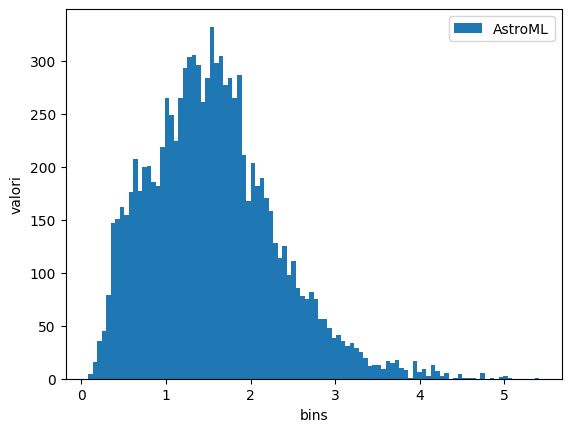

In [2]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

n_bins = 100 #numero bins all'istogramma

plt.hist(z, n_bins, label = "AstroML")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend() 

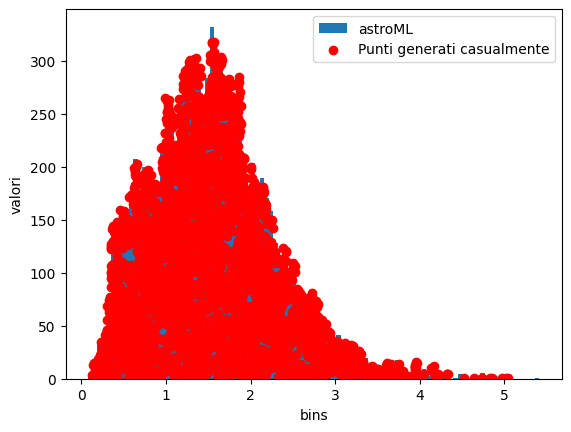

In [ ]:
plt.hist(z, n_bins,label="astroML") #plot cui sovrappongo i punti generati
N = 10000 #numero punti generati
values , bins = np.histogram(z, n_bins) #estraggo i parametri dall'istogramma, values contiene conteggio degli elementi di z che cadono in ciascun bin, bins contiene i bordi dei bin

x = np.random.uniform(0,max(bins), N) #generazione uniforme
y = np.random.uniform(0,max(values), N)

x_filtered = []
y_filtered = []

for i in range(N):
        bin_index = np.digitize(x[i], bins) - 1  # trova il corrispondente bin di x[i]
        if y[i] < values[bin_index]:  # prende il punto se Y[i] minore dell'istogramma
            x_filtered.append(x[i])
            y_filtered.append(y[i])

plt.scatter(x_filtered,y_filtered , color='red', marker='o', label = "Punti generati casualmente")  
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend() 


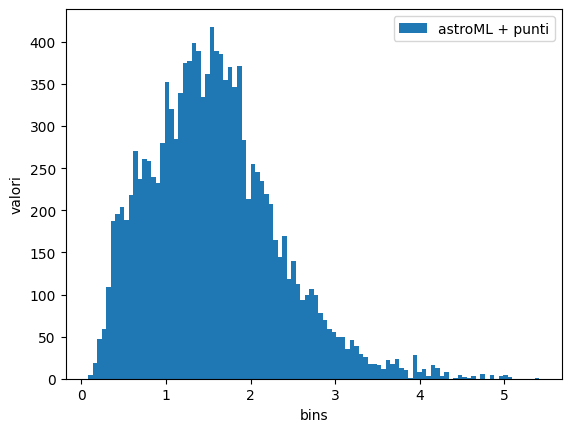

In [4]:
z_augmented = np.concatenate([z, x_filtered])

plt.hist(z_augmented, n_bins, label = "astroML + punti" )
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()


**Ricaviamo la CDF**

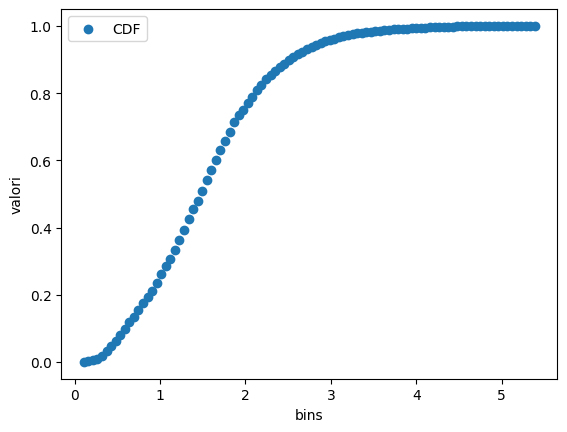

In [ ]:
somma = np.sum(values) 
values = values/somma #normalizzazione

cdf = np.cumsum(values) #magiche funzioni di python

bin_center = ((bins[:-1] + bins[1:])/2)

plt.scatter(bin_center,cdf,label="CDF")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()

**Ricavo la quantile, cioè l'inversa della CDF**


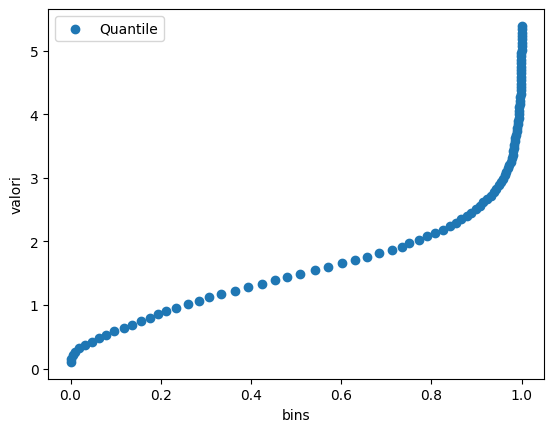

In [ ]:
#ho semplicemente invertito x e y dei punti --> inversa è uguale a simmetrica rispetto bisettrice primo/terzo per funzioni monotone crescenti
x_quantile = cdf
y_quantile = bin_center

plt.scatter(x_quantile,y_quantile,label="Quantile") 
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()

**Genero numeri uniformi in X --> metodo dell'inversa**


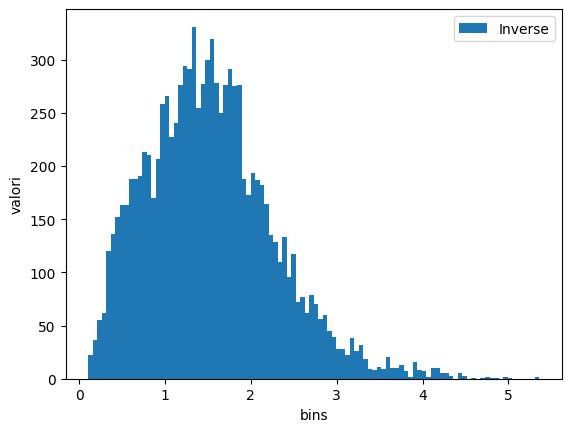

In [7]:
num = np.random.uniform(0,1,N)

y_rand = np.interp(num, x_quantile, y_quantile) #funzione che ricava la y dai punti discreti 

plt.hist(y_rand,n_bins, label = "Inverse")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()

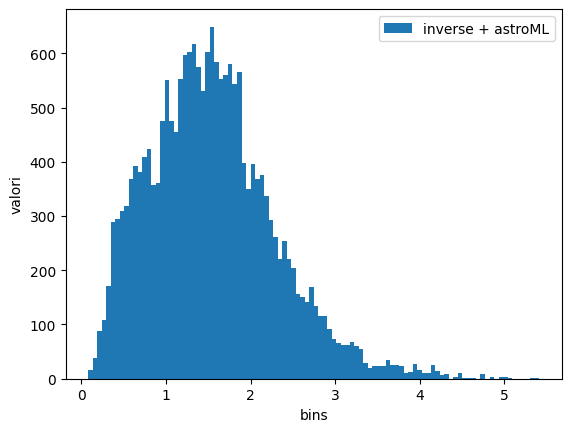

In [8]:
z_augmented_2 = np.concatenate([z, y_rand])

plt.hist(z_augmented_2,n_bins, label = "inverse + astroML")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()

**Confronto**

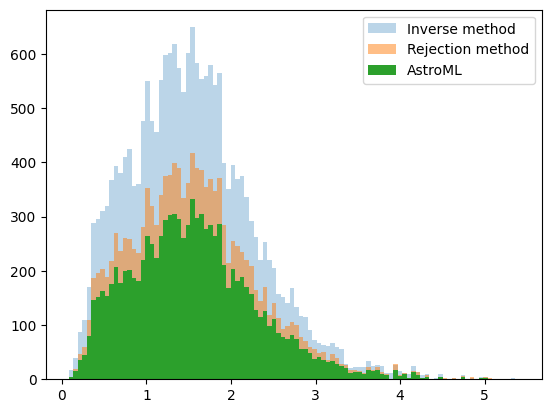

In [9]:
plt.hist(z_augmented_2, n_bins, alpha = 0.3, label = "Inverse method") 
plt.hist(z_augmented, n_bins, alpha = 0.5, label = "Rejection method") 
plt.hist(z, n_bins, label = "AstroML") 
plt.legend()

**Studio dei residui**

